### Project

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Task 3

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

### Task 4

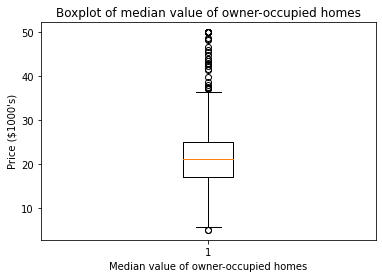

In [5]:
# Boxplot for the "Median value of owner-occupied homes"
plt.boxplot(boston_df["MEDV"])
plt.xlabel("Median value of owner-occupied homes")
plt.ylabel("Price (\$1000's)")
plt.title("Boxplot of median value of owner-occupied homes")
plt.show()

Findings: Median is 20

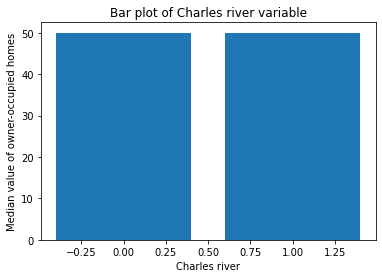

In [7]:
# Bar plot for the Charles river variable
plt.bar(boston_df["CHAS"], boston_df["MEDV"])
plt.xlabel("Charles river")
plt.ylabel("Median value of owner-occupied homes")
plt.title("Bar plot of Charles river variable")
plt.show()

Findings: both medians are equal

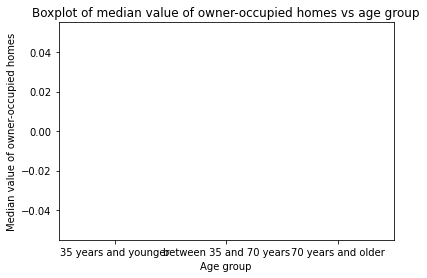

In [8]:
# Boxplot for the MEDV variable vs the AGE variable
age_groups = ["35 years and younger", "between 35 and 70 years", "70 years and older"]
medv_by_age = {}
for age_group in age_groups:
    medv_by_age[age_group] = boston_df[boston_df["AGE"].isin([age_group])]["MEDV"]

plt.boxplot([medv_by_age[age_group] for age_group in age_groups])
plt.xticks([1, 2, 3], age_groups)
plt.xlabel("Age group")
plt.ylabel("Median value of owner-occupied homes")
plt.title("Boxplot of median value of owner-occupied homes vs age group")
plt.show()

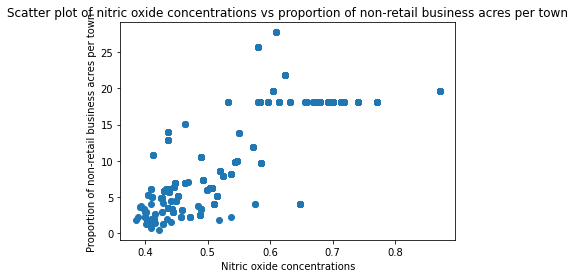

In [9]:
# Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
plt.scatter(boston_df["NOX"], boston_df["INDUS"])
plt.xlabel("Nitric oxide concentrations")
plt.ylabel("Proportion of non-retail business acres per town")
plt.title("Scatter plot of nitric oxide concentrations vs proportion of non-retail business acres per town")
plt.show()

Findings: the less nitric oxide concentration, the less Proportion of non-retail business acres per town

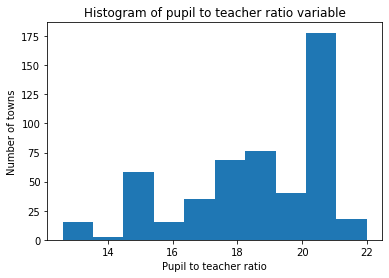

In [11]:
# Histogram for the pupil to teacher ratio variable
plt.hist(boston_df["PTRATIO"])
plt.xlabel("Pupil to teacher ratio")
plt.ylabel("Number of towns")
plt.title("Histogram of pupil to teacher ratio variable")
plt.show()

Findings: pupil to teachers ratio is not normally distributed and is mostlu at around 21

### Task 5

In [13]:
import scipy.stats as stats

In [15]:
# Create the t-test
ttest = stats.ttest_ind(boston_df["MEDV"][boston_df["CHAS"] == 1], boston_df["MEDV"][boston_df["CHAS"] == 0])

# Print the results of the t-test
print(ttest)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)


In [16]:
import statsmodels.api as sm


# Create the ANOVA model
model = sm.OLS(boston_df["MEDV"], boston_df[["AGE"]])

# Fit the model
results = model.fit()

# Print the results of the ANOVA
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              915.1
Date:                Thu, 07 Sep 2023   Prob (F-statistic):                   1.85e-115
Time:                        08:36:29   Log-Likelihood:                         -2071.5
No. Observations:                 506   AIC:                                      4145.
Df Residuals:                     505   BIC:                                      4149.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
# Calculate the Pearson correlation coefficient
correlation = np.corrcoef(boston_df["NOX"], boston_df["INDUS"])[0, 1]

# Calculate the p-value
p_value = stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])[1]

# Print the results of the correlation test
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: 0.763651446920914
p-value: 7.91336106123623e-98
